In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pprint
import re
import os

In [50]:
class bot:
    def __init__(self, company_ticker):
        self.company_ticker = company_ticker
        self.chrome_options = Options()
        self.chrome_options.add_argument("--disable-extensions")
        self.chrome_options.add_argument("--disable-gpu")
        self.chrome_options.add_argument("--headless")
        self.driver = webdriver.Chrome(os.path.join(os.getcwd(), 'chromedriver_win32\chromedriver.exe'), options=self.chrome_options)        
        self.driver.get('https://www.msci.com/our-solutions/esg-investing/esg-ratings/esg-ratings-corporate-search-tool/issuer/')

    def accept_cookies(self):
        cookie_accept_xpath = '//*[@id="portlet_mscicookiebar_WAR_mscicookiebar"]/div/div[2]/div/div/div[1]/div/button[1]'
        self.clickButton(cookie_accept_xpath)
        time.sleep(1)

    def search_for_company(self):
        company_search_field_xpath = '//*[@id="_esgratingsprofile_keywords"]'
        self.enterData(company_search_field_xpath, self.company_ticker)

    def select_company(self):
        company_search_dropdown = '//*[@id="ui-id-1"]' #/li'
        self.clickButton(company_search_dropdown)
        

    def get_esg_ratings(self):
        esg_ratings_xpath = '//*[@id="_esgratingsprofile_esg-rating-history"]'
        esg_data = self.grabData(esg_ratings_xpath)
        return esg_data

    def grabData(self, xpath):
        try:
            data = self.driver.find_element_by_xpath(xpath)
        except Exception:
            time.sleep(2)
            data = self.driver.find_element_by_xpath(xpath)
        return data

    def clickButton(self, xpath):
        try:
            self.driver.find_element_by_xpath(xpath).click()
        except Exception:
            time.sleep(2)
            self.clickButton(xpath)

    def enterData(self, xpath, data):
        try:
            self.driver.find_element_by_xpath(xpath).send_keys(data)
            pass
        except Exception:
            time.sleep(1)
            self.enterData(field, data)

    def initializeScrapeProcess(self):
        self.accept_cookies()
        self.search_for_company()
        self.select_company()
        data = self.get_esg_ratings().get_attribute('innerHTML')
        self.driver.quit()
        return data

In [28]:
def scrapy_esg_bot(ticker_symbol):
    webscrape_bot = bot(ticker_symbol)
    data = webscrape_bot.initializeScrapeProcess()
    return data

In [29]:
data3 = scrapy_esg_bot('tsla')

In [52]:
data3 = bot('tsla').initializeScrapeProcess()

In [8]:
def scrapy_esg_bot2(ticker_symbol):
    webscrape_bot = bot(ticker_symbol)
    webscrape_bot.accept_cookies()
    webscrape_bot.search_for_company()
    webscrape_bot.select_company()
    data = webscrape_bot.get_esg_ratings().get_attribute('innerHTML')
    webscrape_bot.driver.quit()
    return data

In [16]:
data2 = scrapy_esg_bot2('mng')

NameError: name 'data' is not defined

In [54]:
pprint.pprint(data3)

('<div id="highcharts-5gdello-0" dir="ltr" class="highcharts-container " '
 'style="position: relative; overflow: hidden; width: 703px; height: 250px; '
 'text-align: left; line-height: normal; z-index: 0; '
 '-webkit-tap-highlight-color: rgba(0, 0, 0, 0); color: rgb(0, 32, 54);"><svg '
 'version="1.1" class="highcharts-root" style="font-family:\'Roboto Regular\', '
 'sans-serif;;font-size:12px;;color:#002036;fill:#002036;" '
 'xmlns="http://www.w3.org/2000/svg" width="703" height="250" viewBox="0 0 703 '
 '250"><desc>Created with Highcharts 7.2.0</desc><defs><clipPath '
 'id="highcharts-5gdello-1-"><rect x="0" y="0" width="641" height="200" '
 'fill="none"></rect></clipPath><clipPath id="highcharts-5gdello-8-"><rect '
 'x="0" y="0" width="641" height="200" '
 'fill="none"></rect></clipPath></defs><rect fill="#ffffff" '
 'class="highcharts-background" x="0" y="0" width="703" height="250" rx="0" '
 'ry="0"></rect><rect fill="none" class="highcharts-plot-background" x="52" '
 'y="10" wid

In [55]:
data3.split('style="font-size:14px;;font-weight:bold;color:#FFFFFF')[1]

';fill:#FFFFFF;" y="19">AAA</text></g><g class="highcharts-label highcharts-data-label highcharts-data-label-color-undefined" data-z-index="1" transform="translate(178,27)"><text x="5" data-z-index="1" '

In [56]:
search_points_esg = []
for i in re.finditer('style="font-size:14px;;font-weight:bold;color:#FFFFFF', data3):
    print('text found', i.start(), i.end())
    search_points_esg.append(i.end())

search_points_esg.append( search_points_esg[-1] + 50 )

text found 5526 5579
text found 5780 5833
text found 6033 6086
text found 6286 6339
text found 6538 6591


In [57]:
search_points_esg

[5579, 5833, 6086, 6339, 6591, 6641]

In [58]:
result = re.search('">(.*)</text>', data3[search_points_esg[0]: search_points_esg[1]])
print(result.group(1))

AAA


In [59]:
results = []
for index, value in enumerate(search_points_esg):
    if value == search_points_esg[-1]:
        break
    else:
        result = re.search('">(.*)</text>', data3[ search_points_esg[index]: search_points_esg[index+1] ])
        results.append(result.group(1))
results

['AAA', 'AA', 'AA', 'A', 'A']

In [60]:
dates = re.findall(r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\-\d{2}', data3)
dates
#search_points_date.append( search_points_date[-1] + 50 )
#search_points_date

['Jul-17', 'Apr-18', 'Aug-18', 'Apr-19', 'Apr-20']

In [61]:
results

['AAA', 'AA', 'AA', 'A', 'A']

In [64]:
import yfinance as yf
import pandas as pd

In [46]:
appl_data1 = yf.download("AAPL", start="2019-05-01", end="2020-12-01")
#appl_data1 = yf.download("AAPL", start="2019-05-01", end="2019-05-01")

[*********************100%***********************]  1 of 1 completed


In [47]:
appl_data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-30,50.764999,50.849998,49.777500,50.167500,49.138439,186139600
2019-05-01,52.470001,53.827499,52.307499,52.630001,51.550426,259309200
2019-05-02,52.459999,53.162498,52.032501,52.287498,51.214951,127985200
2019-05-03,52.722500,52.959999,52.557499,52.937500,51.851620,83569600
2019-05-06,51.072498,52.209999,50.875000,52.119999,51.050892,129772400
...,...,...,...,...,...,...
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.680122,127959300
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.998154,113874200
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.856873,76499200


In [ ]:
//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[1]
//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[1]

//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[2]
//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[2]

//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[3]/div[1]

//*[@id="_esgratingsprofile_esg-ratings-profile-header"]/div[1]/div[3]/div[2]

In [73]:
test_data = [['A', 'A', 'A', 'A', 'BBB'], ['Oct-16', 'Aug-17', 'Sep-18', 'Nov-19', 'Dec-20']]

In [80]:
pd.DataFrame(test_data, index=['ESG Score', 'Date']).T

,ESG Score,Date
0,A,Oct-16
1,A,Aug-17
2,A,Sep-18
3,A,Nov-19
4,BBB,Dec-20


In [78]:
test_list = [['a','b','c'], ['AA','BB','CC']]
pd.DataFrame(test_list, index=['col_low', 'col_up']).T

,col_low,col_up
0,a,AA
1,b,BB
2,c,CC


In [83]:
test_data = [['A', 'A', 'A', 'A', 'BBB'], ['Oct-16', 'Aug-17', 'Sep-18', 'Nov-19', 'Dec-20']]

mydf = pd.DataFrame(list(zip(test_data[0], test_data[1])), columns = ['ESG Score', 'Date'])

mydf

,ESG Score,Date
0,A,Oct-16
1,A,Aug-17
2,A,Sep-18
3,A,Nov-19
4,BBB,Dec-20


In [89]:
mydf['Date'] = pd.to_datetime( mydf['Date'], format='%b-%y')

In [90]:
mydf

,ESG Score,Date
0,A,2016-10-01
1,A,2017-08-01
2,A,2018-09-01
3,A,2019-11-01
4,BBB,2020-12-01


In [96]:
for i in mydf['Date']:
    stock_data = yf.download("msft", start=i, end=i + pd.DateOffset(1))
    print(stock_data)

[*********************100%***********************]  1 of 1 completed
             Open   High    Low      Close  Adj Close    Volume
Date                                                           
2016-09-30  57.57  57.77  57.34  57.599998  53.518501  29910800
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-07-31  73.300003  73.440002  72.410004  72.699997  68.809288  23600100
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-31  111.690002  112.779999  111.519997  112.330002  108.811172   

              Volume  
Date                  
2018-08-31  23222700  
[*********************100%***********************]  1 of 1 completed

1 Failed do

In [147]:
start_date = mydf.iloc[0]['Date'] - pd.DateOffset(30)
end_date = mydf.iloc[-1]['Date'] + pd.DateOffset(30)
stock_data2 = yf.download("msft", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [148]:
mydf.iloc[0]['Date']

Timestamp('2016-10-01 00:00:00')

In [149]:
mydf.iloc[-1]['Date']

Timestamp('2020-12-01 00:00:00')

In [150]:
stock_data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-31,57.650002,57.799999,57.299999,57.459999,53.388424,20860300
2016-09-01,57.009998,57.820000,57.009998,57.590000,53.509209,26075400
2016-09-02,57.669998,58.189999,57.419998,57.669998,53.583530,18900500
2016-09-06,57.779999,57.799999,57.209999,57.610001,53.527790,16278400
2016-09-07,57.470001,57.840000,57.410000,57.660000,53.574242,17493400


In [141]:
stock_data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,57.570000,57.770000,57.340000,57.599998,53.518501,29910800
2016-10-03,57.410000,57.549999,57.060001,57.419998,53.351246,19189500
2016-10-04,57.270000,57.599998,56.970001,57.240002,53.184006,20085900
2016-10-05,57.290001,57.959999,57.259998,57.639999,53.555664,16726400
2016-10-06,57.740002,57.860001,57.279999,57.740002,53.648579,16212600
...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,220.512131,18699600
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.238144,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.443069,17933500


In [139]:
#stock_data2.groupby( stock_data2['Date'].dt.strftime('%B') )['Adj Close']
#df.groupby(df['date'].dt.strftime('%B'))['Revenue'].sum().sort_values()

dg = stock_data2.groupby(pd.Grouper(key='Date', freq='1M')).sum()

KeyError: 'The grouper name Date is not found'

In [151]:
stock_data2['30ma'] = stock_data2['Adj Close'].rolling(window=30).mean()

In [152]:
stock_data2

,Open,High,Low,Close,Adj Close,Volume,30ma
Date,,,,,,,
2016-08-31,57.650002,57.799999,57.299999,57.459999,53.388424,20860300,NaN
2016-09-01,57.009998,57.820000,57.009998,57.590000,53.509209,26075400,NaN
2016-09-02,57.669998,58.189999,57.419998,57.669998,53.583530,18900500,NaN
2016-09-06,57.779999,57.799999,57.209999,57.610001,53.527790,16278400,NaN
2016-09-07,57.470001,57.840000,57.410000,57.660000,53.574242,17493400,NaN
...,...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,220.512131,18699600,214.759686
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.238144,10550600,214.984683
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.443069,17933500,215.319996


In [153]:
stock_data2.dropna(inplace=True)

In [157]:
stock_data2.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume,30ma
Date,,,,,,,
2016-10-31,58.817857,59.205000,58.461429,58.805714,54.638771,3.413175e+07,53.488741
2016-11-30,59.958571,60.388571,59.437619,59.925238,55.877551,2.919318e+07,54.794964
2016-12-31,62.103810,62.545715,61.683809,62.118095,58.106348,2.445618e+07,56.555631
2017-01-31,63.185500,63.530000,62.752500,63.192000,59.110895,2.467268e+07,58.399418
2017-02-28,64.134737,64.389474,63.782632,64.113684,60.165436,2.319705e+07,59.404934
2017-03-31,64.764349,65.149130,64.443913,64.841305,61.021400,2.126825e+07,60.496600
2017-04-30,66.238948,66.518421,65.807369,66.171579,62.273306,2.279954e+07,61.313974
2017-05-31,68.828182,69.209545,68.441818,68.917273,65.043111,2.350993e+07,63.273364
2017-06-30,70.561818,71.014545,69.835454,70.518182,66.744236,2.862349e+07,65.811808


In [156]:
stock_data2

,Open,High,Low,Close,Adj Close,Volume,30ma
Date,,,,,,,
2016-10-12,57.110001,57.270000,56.400002,57.110001,53.063221,22177500,53.293025
2016-10-13,56.700001,57.299999,56.320000,56.919998,52.886677,25313700,53.276300
2016-10-14,57.119999,57.740002,57.119999,57.419998,53.351246,27402500,53.271034
2016-10-17,57.360001,57.459999,56.869999,57.220001,53.165421,23830000,53.257097
2016-10-18,57.529999,57.950001,57.410000,57.660000,53.574242,19149500,53.258646
...,...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,220.512131,18699600,214.759686
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.238144,10550600,214.984683
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.443069,17933500,215.319996


In [158]:
start_date = mydf.iloc[0]['Date']
end_date = mydf.iloc[-1]['Date'] + pd.DateOffset(30)
stock_data3 = yf.download("msft", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [213]:
stock_data3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,57.570000,57.770000,57.340000,57.599998,53.518501,29910800
2016-10-03,57.410000,57.549999,57.060001,57.419998,53.351246,19189500
2016-10-04,57.270000,57.599998,56.970001,57.240002,53.184006,20085900
2016-10-05,57.290001,57.959999,57.259998,57.639999,53.555664,16726400
2016-10-06,57.740002,57.860001,57.279999,57.740002,53.648579,16212600
...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,220.512131,18699600
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.238144,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,224.443069,17933500


In [214]:
new_df = stock_data3.resample('M').mean()
new_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,57.570000,57.770000,57.340000,57.599998,53.518501,2.991080e+07
2016-10-31,58.419524,58.772857,58.057619,58.397619,54.259594,2.927818e+07
2016-11-30,59.958571,60.388571,59.437619,59.925238,55.877551,2.919318e+07
2016-12-31,62.103810,62.545715,61.683809,62.118095,58.106348,2.445618e+07
2017-01-31,63.185500,63.530000,62.752500,63.192000,59.110895,2.467268e+07
2017-02-28,64.134737,64.389474,63.782632,64.113684,60.165436,2.319705e+07
2017-03-31,64.764349,65.149130,64.443913,64.841305,61.021400,2.126825e+07
2017-04-30,66.238948,66.518421,65.807369,66.171579,62.273306,2.279954e+07
2017-05-31,68.828182,69.209545,68.441818,68.917273,65.043111,2.350993e+07


In [215]:
new_df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)

,Adj Close
Date,
2016-09-30,53.518501
2016-10-31,54.259594
2016-11-30,55.877551
2016-12-31,58.106348
2017-01-31,59.110895
2017-02-28,60.165436
2017-03-31,61.021400
2017-04-30,62.273306
2017-05-31,65.043111


In [216]:
#mydf = mydf.set_index('Date')
mydf

,ESG Score,per
Date,,
2016-10-01,A,2016-10
2017-08-01,A,2017-08
2018-09-01,A,2018-09
2019-11-01,A,2019-11
2020-12-01,BBB,2020-12


In [230]:
mydf.iloc[0]

ESG Score          A
per          2016-10
Name: 2016-10-01 00:00:00, dtype: object

In [217]:
mydf['per'] = mydf.index.get_level_values('Date').to_period('M')
mydf

,ESG Score,per
Date,,
2016-10-01,A,2016-10
2017-08-01,A,2017-08
2018-09-01,A,2018-09
2019-11-01,A,2019-11
2020-12-01,BBB,2020-12


In [218]:
new_df['per'] = new_df.index.get_level_values('Date').to_period('M')
new_df

,Open,High,Low,Close,Adj Close,Volume,per
Date,,,,,,,
2016-09-30,57.570000,57.770000,57.340000,57.599998,53.518501,2.991080e+07,2016-09
2016-10-31,58.419524,58.772857,58.057619,58.397619,54.259594,2.927818e+07,2016-10
2016-11-30,59.958571,60.388571,59.437619,59.925238,55.877551,2.919318e+07,2016-11
2016-12-31,62.103810,62.545715,61.683809,62.118095,58.106348,2.445618e+07,2016-12
2017-01-31,63.185500,63.530000,62.752500,63.192000,59.110895,2.467268e+07,2017-01
2017-02-28,64.134737,64.389474,63.782632,64.113684,60.165436,2.319705e+07,2017-02
2017-03-31,64.764349,65.149130,64.443913,64.841305,61.021400,2.126825e+07,2017-03
2017-04-30,66.238948,66.518421,65.807369,66.171579,62.273306,2.279954e+07,2017-04
2017-05-31,68.828182,69.209545,68.441818,68.917273,65.043111,2.350993e+07,2017-05


In [223]:
nndf = pd.merge(mydf, new_df, on=['per'], how='inner')#.drop('per', axis=1)
nndf

,ESG Score,per,Open,High,Low,Close,Adj Close,Volume
0,A,2016-10,58.419524,58.772857,58.057619,58.397619,54.259594,2.927818e+07
1,A,2017-08,72.715652,73.196087,72.285218,72.816958,69.128269,1.930741e+07
2,A,2018-09,112.077369,112.946316,111.212106,112.237895,108.721947,2.527661e+07
3,A,2019-11,147.854000,148.553503,147.155501,148.095500,145.887241,1.961859e+07
4,BBB,2020-12,217.418095,219.363334,215.834287,217.750952,217.250586,2.732685e+07


In [212]:
nndf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)

,ESG Score,per,Adj Close
0,A,2016-10,54.259594
1,A,2017-08,69.128269
2,A,2018-09,108.721947
3,A,2019-11,145.887241
4,BBB,2020-12,217.250586


In [226]:
nndf.iloc[0]['per']

Period('2016-10', 'M')

In [227]:
nndf.iloc[-1]['per']

Period('2020-12', 'M')

In [231]:
test_data = [['A', 'A', 'A', 'A', 'BBB'], ['Oct-16', 'Aug-17', 'Sep-18', 'Nov-19', 'Dec-20']]

mydf = pd.DataFrame(list(zip(test_data[0], test_data[1])), columns = ['ESG Score', 'Date'])

mydf

,ESG Score,Date
0,A,Oct-16
1,A,Aug-17
2,A,Sep-18
3,A,Nov-19
4,BBB,Dec-20


In [232]:
mydf['Date'] = pd.to_datetime( mydf['Date'], format='%b-%y')
mydf

,ESG Score,Date
0,A,2016-10-01
1,A,2017-08-01
2,A,2018-09-01
3,A,2019-11-01
4,BBB,2020-12-01


In [233]:
mydf = mydf.set_index('Date')

In [234]:
mydf

,ESG Score
Date,
2016-10-01,A
2017-08-01,A
2018-09-01,A
2019-11-01,A
2020-12-01,BBB


In [240]:
mydf.index.min()

Timestamp('2016-10-01 00:00:00')

In [241]:
mydf.index.max()

Timestamp('2020-12-01 00:00:00')

In [243]:
tss = yf.download('tsla', mydf.index.min(), mydf.index.max()+ pd.DateOffset(30))

[*********************100%***********************]  1 of 1 completed


In [244]:
import matplotlib.pyplot as plt

In [249]:
nnndf = nndf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
nnndf

,ESG Score,per,Adj Close
0,A,2016-10,54.259594
1,A,2017-08,69.128269
2,A,2018-09,108.721947
3,A,2019-11,145.887241
4,BBB,2020-12,217.250586


In [254]:
nnndf = nnndf.set_index('per')
nnndf

,ESG Score,Adj Close
per,,
2016-10,A,54.259594
2017-08,A,69.128269
2018-09,A,108.721947
2019-11,A,145.887241
2020-12,BBB,217.250586


In [259]:
nnndf.plot(x ='per', y='Adj Close',kind='scatter')

KeyError: 'per'

<AxesSubplot:xlabel='per'>

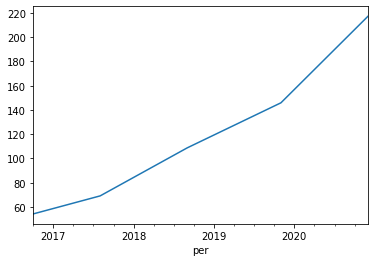

In [262]:
nnndf['Adj Close'].plot()

In [264]:
esg_score_to_num_map = {
    'AAA' : 9,
    'AA' : 8,
    'A' : 7,
    'BBB' : 6,
    'BB' : 5,
    'B' : 4,
    'CCC' : 3,
    'CC' : 2,
    'C' : 1
}

In [265]:
nnndf['ESG Value'] = nnndf['ESG Score'].map(esg_score_to_num_map)
nnndf

,ESG Score,Adj Close,ESG Value
per,,,
2016-10,A,54.259594,7
2017-08,A,69.128269,7
2018-09,A,108.721947,7
2019-11,A,145.887241,7
2020-12,BBB,217.250586,6


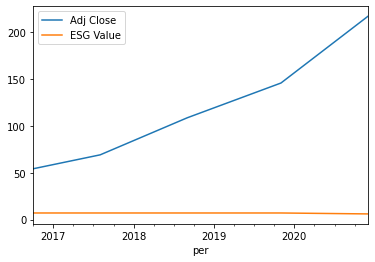

In [293]:
ax = nnndf.plot(secondary_y='y')
#ax2 = ax.twinx()
ax2.set_yscale('log')
plt.show()

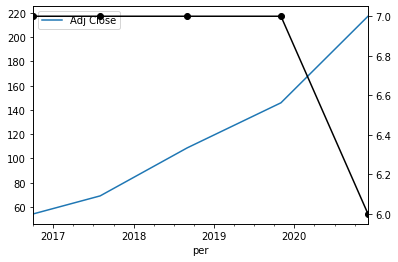

In [298]:
nnndf.plot(y='Adj Close')
bx = nnndf['ESG Value'].plot(secondary_y=True, color='k', marker='o')
#bx2 = nnndf.plot(secondary_y=True, color='k', marker='o')
#bx2.set_ylabel('size')

In [283]:
nnndf

,ESG Score,Adj Close,ESG Value
per,,,
2016-10,A,54.259594,7
2017-08,A,69.128269,7
2018-09,A,108.721947,7
2019-11,A,145.887241,7
2020-12,BBB,217.250586,6


In [297]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(nnndf['ESG Score'], label='ESG')

# for i,j in plotable_df.esg_scores.items():
#             ax.annotate(str(j), xy=(i, j))
plt.show()

TypeError: float() argument must be a string or a number, not 'Period'